In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#from pycaret.classification import *

In [3]:
df = pd.read_csv("..\dataset\Absenteeism_at_work.csv", delimiter = ";")

In [4]:
group_hours = []
for index, row in df.iterrows():
    if row["Absenteeism time in hours"] <= 2: group_hours.append("short")
    elif row["Absenteeism time in hours"] <= 8: group_hours.append("medium")
    else: group_hours.append("long")

df["Group Hours"] = group_hours
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Group Hours
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,medium
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,short
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,short
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,medium
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,short


In [5]:
df["Education"].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

In [6]:
education_col = []
for i,r in df.iterrows():
    if r["Education"] == 1: education_col.append("High School")
    else: education_col.append("University")

df["Education"] = education_col

In [7]:
df["Education"].value_counts()

High School    611
University     129
Name: Education, dtype: int64

(array([  6., 153.,  50.,  39., 189.,  51.,  42.,   7.,   1., 202.]),
 array([ 5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3, 52. ]),
 <BarContainer object of 10 artists>)

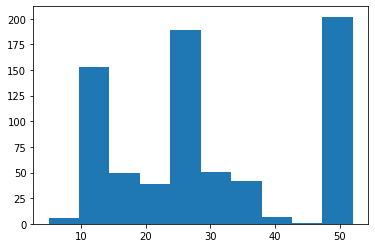

In [8]:
plt.hist(df["Distance from Residence to Work"])

In [9]:
distance_col = []
for i,r in df.iterrows():
    if r["Distance from Residence to Work"] < 20: distance_col.append("close")
    elif r["Distance from Residence to Work"] < 40: distance_col.append("mid")
    else: distance_col.append("far")
    

df["Distance from Residence to Work"] = distance_col
df["Distance from Residence to Work"].value_counts()

mid      321
far      210
close    209
Name: Distance from Residence to Work, dtype: int64

(array([124.,   7.,  46.,  22.,  64.,  29.,   0.,  50., 191.,   8.,  58.,
         34.,  24.,   0.,   0.,   2.,  30.,   5.,  37.,   0.,   1.,   0.,
          0.,   0.,   8.]),
 array([27.  , 28.24, 29.48, 30.72, 31.96, 33.2 , 34.44, 35.68, 36.92,
        38.16, 39.4 , 40.64, 41.88, 43.12, 44.36, 45.6 , 46.84, 48.08,
        49.32, 50.56, 51.8 , 53.04, 54.28, 55.52, 56.76, 58.  ]),
 <BarContainer object of 25 artists>)

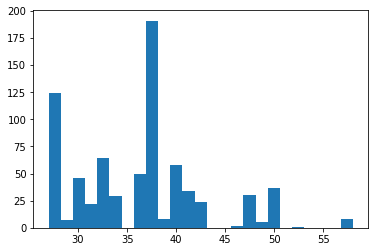

In [10]:
plt.hist(df["Age"], bins = 25)

In [11]:
'''
Age categories:
young = age < 35
adult = 35 <= age < 45
old = 45 <= age
'''

'\nAge categories:\nyoung = age < 35\nadult = 35 <= age < 45\nold = 45 <= age\n'

In [12]:
age_col = []
for i,r in df.iterrows():
    if r["Age"] < 35: age_col.append("young")
    elif r["Age"] < 45: age_col.append("adult")
    else: age_col.append("old")
    

df["Age"] = age_col
df["Age"].value_counts()

adult    365
young    292
old       83
Name: Age, dtype: int64

(array([460., 138.,  96.,   0.,   0.,  32.,   6.,   0.,   0.,   8.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

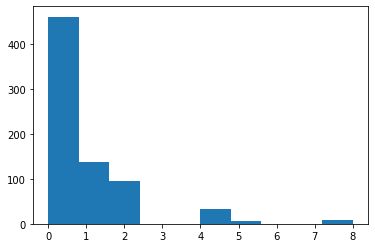

In [13]:
plt.hist(df["Pet"])

In [14]:
pet_col = []
for i,r in df.iterrows():
    if r["Pet"] <= 0: pet_col.append("no")
    elif r["Pet"] <= 2: pet_col.append("few")
    else: pet_col.append("a lot")
    

df["Pet"] = pet_col
df["Pet"].value_counts()

no       460
few      234
a lot     46
Name: Pet, dtype: int64

## Auto ml

In [15]:
#df["Reason for absence"]=df["Reason for absence"].astype("category")

In [16]:
'''
ignore = ["ID", "Service time","Weight","Absenteeism time in hours","Height","Month of absence"]
ordinal= {"Distance from Residence to Work" : ['close', 'mid', 'far'],"Age":["young","adult","old"]}
high_c = ["Reason for absence"]
num = ["Body mass index"]
clf = setup(
        data=df, 
        target="Group Hours", 
        ignore_features= ignore, 
        ordinal_features = ordinal, 
        high_cardinality_features = high_c,
        numeric_features = num
    )
'''

'\nignore = ["ID", "Service time","Weight","Absenteeism time in hours","Height","Month of absence"]\nordinal= {"Distance from Residence to Work" : [\'close\', \'mid\', \'far\'],"Age":["young","adult","old"]}\nhigh_c = ["Reason for absence"]\nnum = ["Body mass index"]\nclf = setup(\n        data=df, \n        target="Group Hours", \n        ignore_features= ignore, \n        ordinal_features = ordinal, \n        high_cardinality_features = high_c,\n        numeric_features = num\n    )\n'

In [17]:
#compare_models()

## Classification

In [18]:
#Classification Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
dummies_cols = ["Age","Seasons","Distance from Residence to Work","Education","Son","Pet"]
df = pd.get_dummies(df,columns= dummies_cols,drop_first=True)
df.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Service time,Work load Average/day,Hit target,Disciplinary failure,Social drinker,...,Seasons_4,Distance from Residence to Work_far,Distance from Residence to Work_mid,Education_University,Son_1,Son_2,Son_3,Son_4,Pet_few,Pet_no
0,11,26,7,3,289,13,239.554,97,0,1,...,0,0,1,0,0,1,0,0,1,0
1,36,0,7,3,118,18,239.554,97,1,1,...,0,0,0,0,1,0,0,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
def classification_accuracy_means(X, y, iterations = 10):
    acc_KN = 0
    acc_DT = 0
    acc_RF = 0
    acc_NB = 0
    acc_SVC = 0
    acc_LGBM = 0
    acc_GBC = 0
    
    for i in range(iterations):
        print(i)
        #Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

        #Scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
        #KNeighbors
        clf = KNeighborsClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_KN += accuracy_score(y_test, y_pred)
        
        #DecisionTree
        clf = DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_DT += accuracy_score(y_test, y_pred)
        
        #RandomForest
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_RF += accuracy_score(y_test, y_pred)
        
        #Gaussian Naives Bayes
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_NB += accuracy_score(y_test, y_pred)
        
        #Support vector machine
        clf = SVC()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_SVC += accuracy_score(y_test, y_pred)
        
        #LightGBM
        clf = LGBMClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_LGBM += accuracy_score(y_test, y_pred)
        
        #GradientBoostingClassifier
        clf = GradientBoostingClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_GBC += accuracy_score(y_test, y_pred)
        clear_output()
        
    
    acc_KN /= iterations
    acc_DT /= iterations
    acc_RF /= iterations
    acc_NB /= iterations
    acc_SVC /= iterations
    acc_LGBM /= iterations
    acc_GBC /= iterations
    
    print(f"Mean accuracy scores in {iterations} iterations:")
    print(f"K Neighbors: {round(acc_KN,2)}")
    print(f"Decision Tree: {round(acc_DT,2)}")
    print(f"Random forest: {round(acc_RF,2)}")
    print(f"Gaussian Naives Bayes: {round(acc_NB,2)}")
    print(f"Support Vector Machine: {round(acc_SVC,2)}")
    print(f"Light GBM: {round(acc_LGBM,2)}")
    print(f"Gradient Boosting: {round(acc_GBC,2)}")

In [21]:
ignored_cols = ["ID","Month of absence","Service time","Weight","Height","Absenteeism time in hours","Group Hours"]
X = df.drop(ignored_cols,axis = 1)
y = df["Group Hours"]




In [24]:
classification_accuracy_means(X,y,20)

Mean accuracy scores in 20 iterations:
K Neighbors: 0.63
Decision Tree: 0.67
Random forest: 0.72
Gaussian Naives Bayes: 0.59
Support Vector Machine: 0.66
Light GBM: 0.74
Gradient Boosting: 0.76


## Regression

In [25]:
#Regression algorithms
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
import sklearn.metrics as sm

In [27]:
def regression_r2_means(X, y, iterations = 10):
    r2_LinR = 0
    r2_LogR = 0
    r2_SVR = 0
    r2_DTR = 0
    r2_RFR = 0
    
    for i in range(iterations):
        print(i)
        #Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

        #Scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
        #Linear Regression
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r2_LinR += sm.r2_score(y_test, y_pred)
        
        #Logistic Regression
        reg = LogisticRegression()
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r2_LogR += sm.r2_score(y_test, y_pred)
        
        #Support Vector Machine
        reg = SVR()
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r2_SVR += sm.r2_score(y_test, y_pred)
        
        #Decision tree
        reg = DecisionTreeRegressor()
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r2_DTR += sm.r2_score(y_test, y_pred)
        
        #Random forest
        reg = RandomForestRegressor()
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r2_RFR += sm.r2_score(y_test, y_pred)
        
        
        #clear_output()
        
    
    r2_LinR /= iterations
    r2_LogR /= iterations
    r2_SVR /= iterations
    r2_DTR /= iterations
    r2_RFR /= iterations
    
    print(f"Mean R2 scores in {iterations} iterations:")
    print(f"Linear Regression: {round(r2_LinR,2)}")
    print(f"Logistic Regression: {round(r2_LogR,2)}")
    print(f"Support Vector Machine: {round(r2_SVR,2)}")
    print(f"Decision Tree: {round(r2_DTR,2)}")
    print(f"Random forest: {round(r2_RFR,2)}")

In [28]:
y = df["Absenteeism time in hours"]

In [29]:
regression_r2_means(X,y,1)

0


c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean R2 scores in 1 iterations:
Linear Regression: -0.26
Logistic Regression: -3.62
Support Vector Machine: 0.1
Decision Tree: -3.55
Random forest: -1.26
